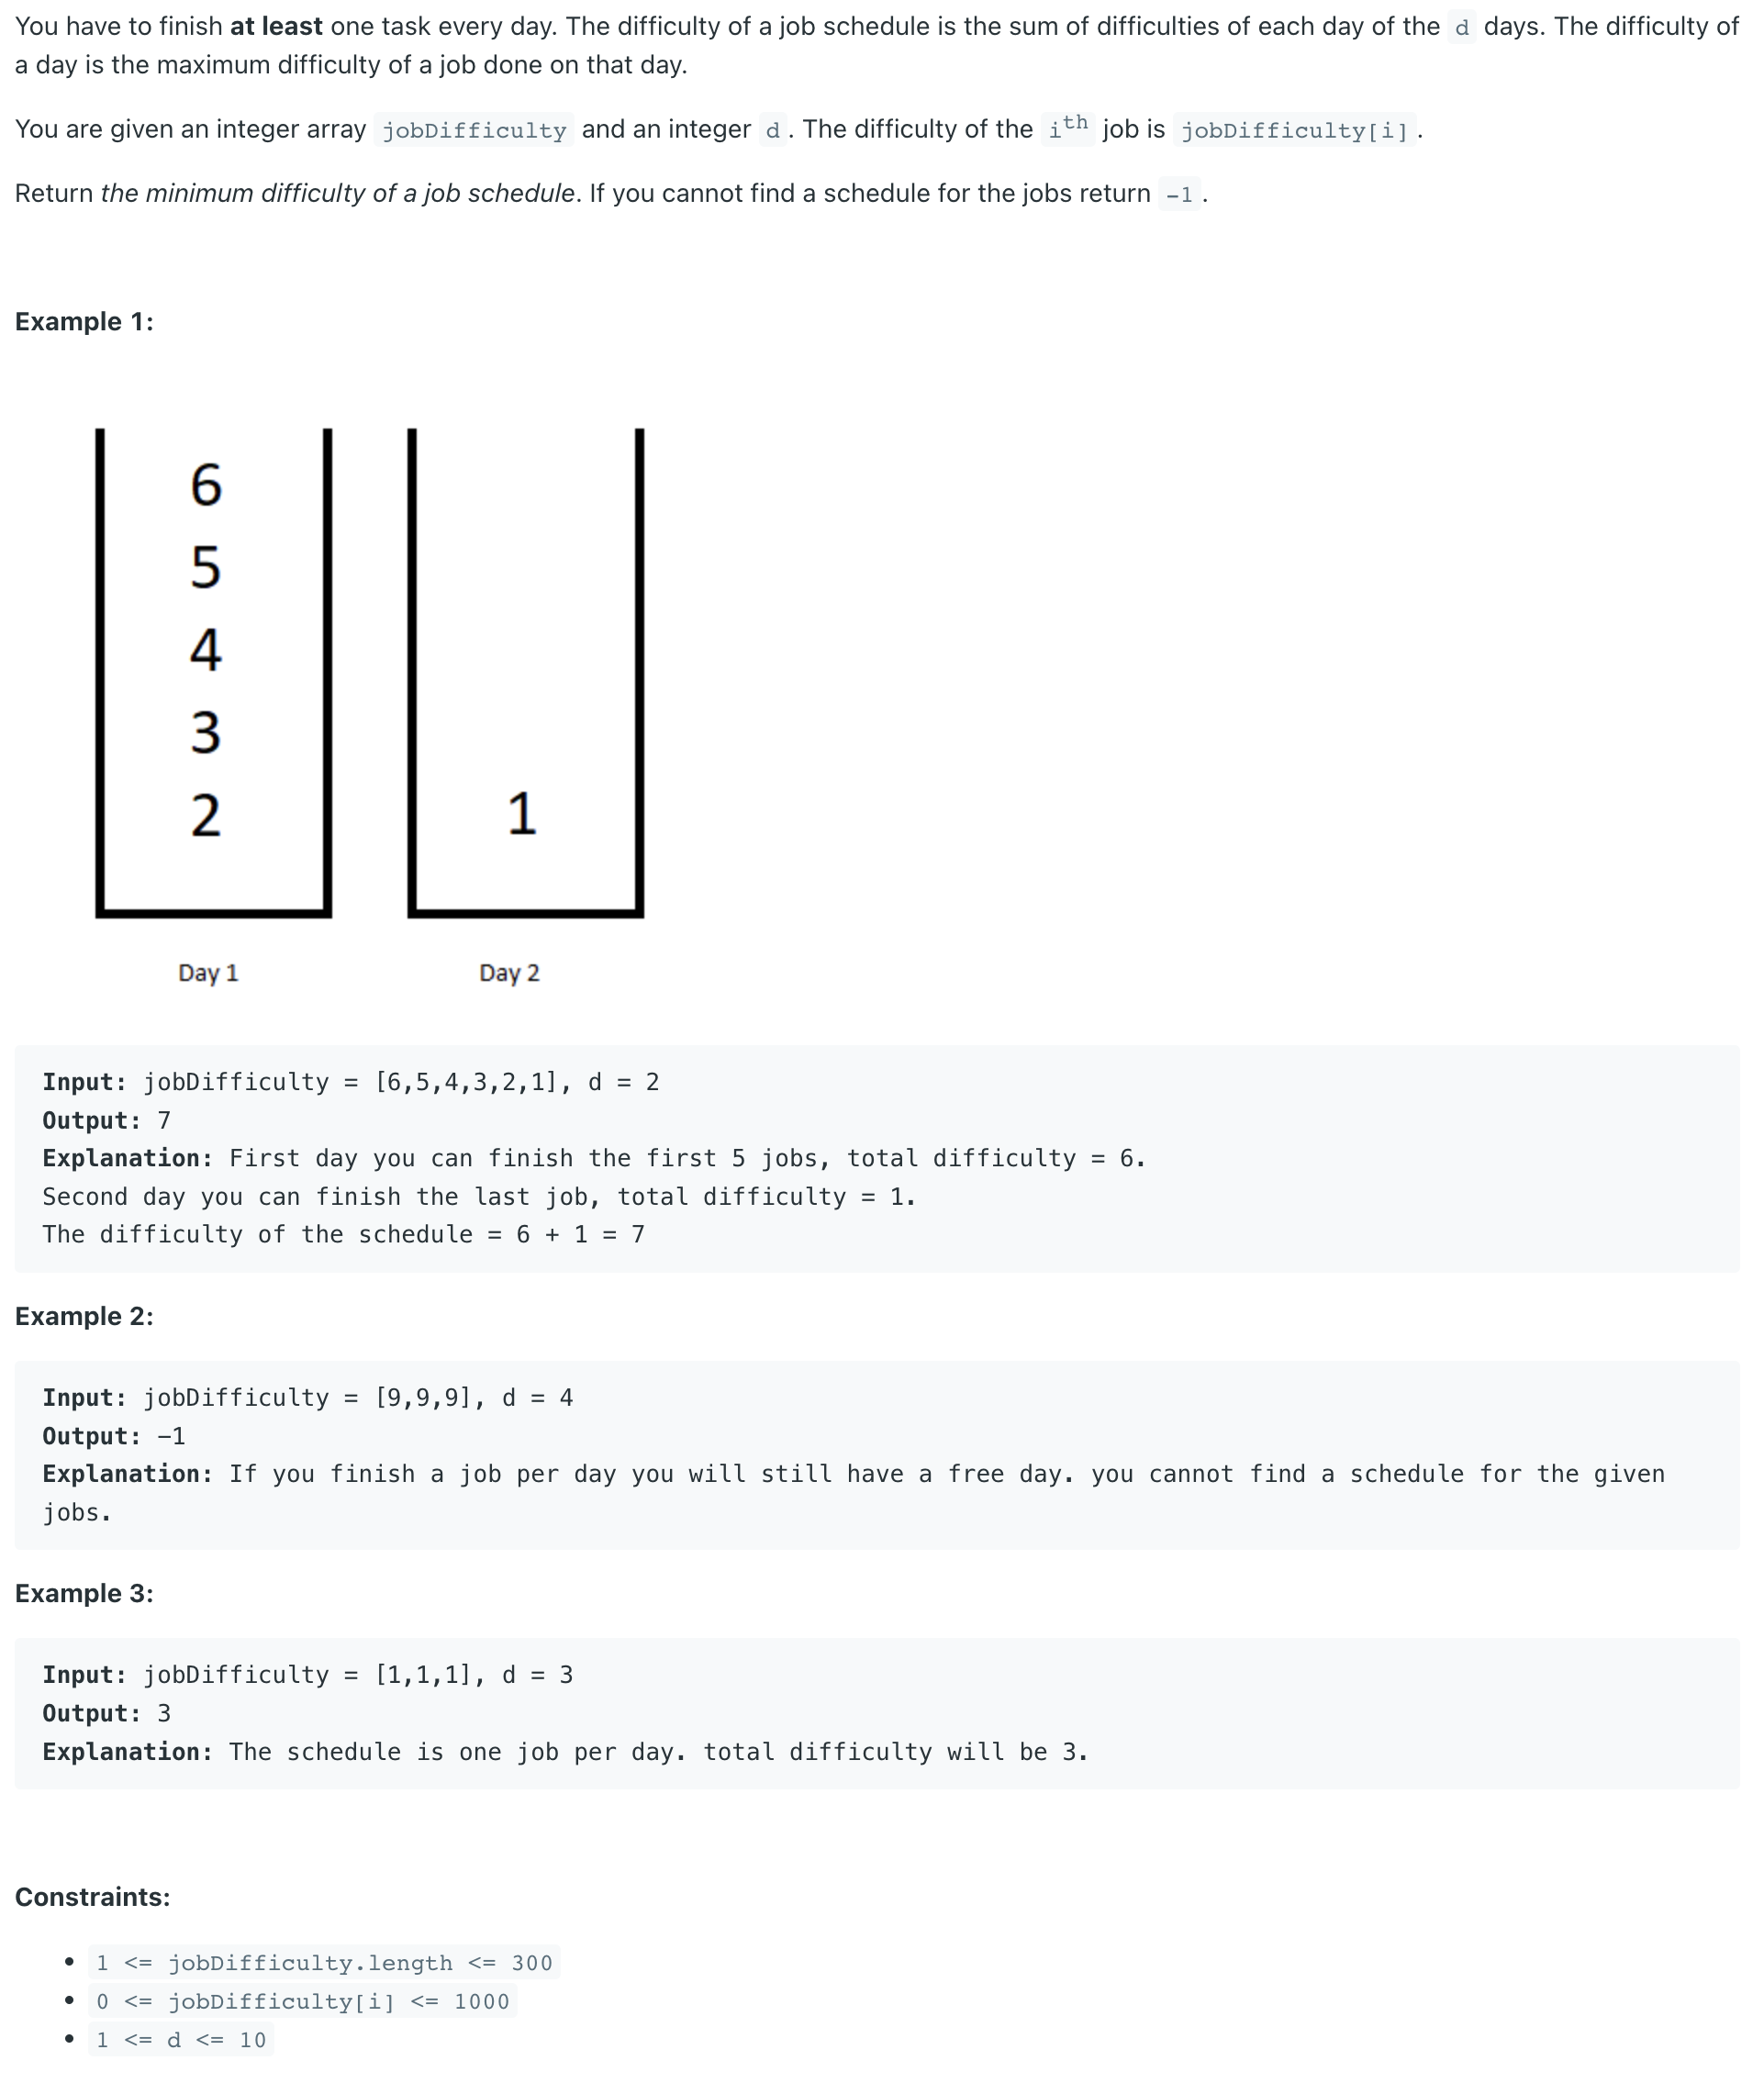

In [ ]:
# 我寫的
# 只是東西會一直存到ans 而且一直用max_job+max(jobDifficulty[start:i+1])
# 所以造成 Time Limit Exceeded
class Solution:
    def minDifficulty(self, jobDifficulty: List[int], d: int) -> int:
        ans = set()
        @lru_cache(None)
        def min_schedule(max_job,start,day):
            # print(max_job,jobDifficulty[start:],day)
            if day > d:
                if start >= len(jobDifficulty): 
                    ans.add(max_job)
                    # print('ans',ans)
                return
            for i in range(start,len(jobDifficulty)):
                # print('i',i)
                min_schedule(max_job+max(jobDifficulty[start:i+1]),i+1,day+1)
        min_schedule(0,0,1)
        # print('ans',ans)
        return min(list(ans)) if ans else -1

In [ ]:
# 後來參考了一個跟我寫的很像的 他有過
# 覺得就是差在他沒有用ans存 而是最後回傳了min
# 還有就是 他有用curmax存 而我是用max_job+max(jobDifficulty[start:i+1])
class Solution:
    def minDifficulty(self, jobDifficulty: List[int], d: int) -> int:
        @lru_cache(None)
        def dfs(i, day):
            print(i,day)
            if d == day:
                if i < len(jobDifficulty): 
                    return float('inf')
                else: 
                    return 0
            curmax = float('-inf')
            res = float('inf')
            for j in range(i,len(jobDifficulty)):
                print('j,jobDifficulty[j]',j,jobDifficulty[j])
                print('curmax, jobDifficulty[j]',curmax, jobDifficulty[j])
                curmax = max(curmax, jobDifficulty[j])
                res = min(res, curmax+dfs(j+1,day+1))
            return res
        res = dfs(0, 0)
        return res if res != inf else -1
    
#https://leetcode.com/problems/minimum-difficulty-of-a-job-schedule/discuss/924611/DFS-greater-DP-Progression-with-Explanation-O(n3d)O(nd)

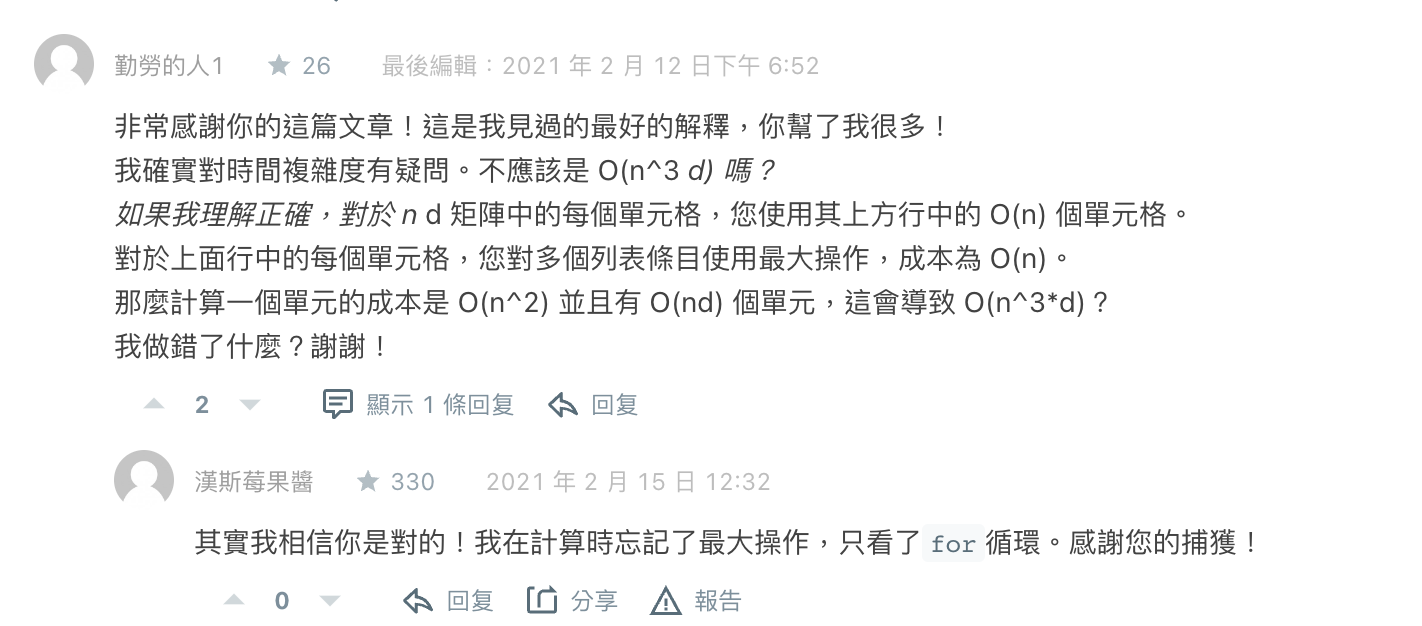